In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from utils import *

random.seed(0)

Defining our dataset

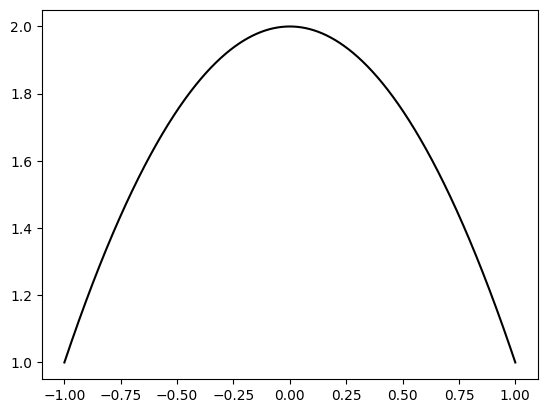

In [2]:
# Our original polynomial is -x^2+1
coefs = [2, 0, -1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle="-", color="black")

draw_polynomial(coefs)
plt.show()

Generating a dataset of 40 points, close to this polynomial

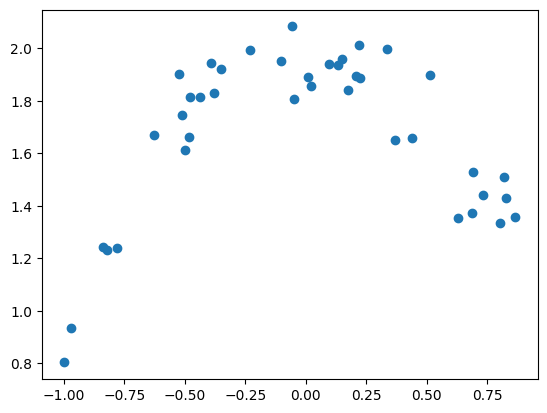

In [3]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,0.1)
    X.append(x)
    Y.append(y)

plt.scatter(X, Y)
plt.show()


Training a polynomial regression model

Let's plot a polynomial of degree 30 to our dataset. Notice how much it overfits!


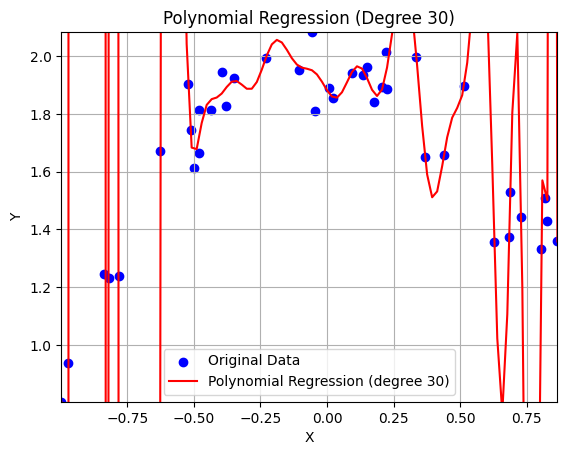

Polynomial Regression (Degree 30) Coefficients: [-1.42968973e+09 -1.47627216e+00  1.04845702e+01  3.24226490e+02
 -1.94864694e+02 -2.53647863e+04 -1.58602522e+04  8.73679623e+05
  8.01500979e+05 -1.61569532e+07 -1.56230572e+07  1.81666024e+08
  1.68326847e+08 -1.33635814e+09 -1.13369207e+09  6.70777843e+09
  5.07756852e+09 -2.34808482e+10 -1.56525755e+10  5.77149428e+10
  3.38086035e+10 -9.89271111e+10 -5.13598696e+10  1.15516253e+11
  5.41442657e+10 -8.74373512e+10 -3.80013824e+10  3.86325600e+10
  1.60718207e+10 -7.55875656e+09 -3.11075214e+09]
Polynomial Regression (Degree 30) Intercept: 1429689732.0896246


In [4]:
degree_used = 30

weights_degree_used, intercept_degree_used = train_and_plot_polynomial_regression(X, Y, 30)
print(f"Polynomial Regression (Degree {degree_used}) Coefficients: {weights_degree_used}")
print(f"Polynomial Regression (Degree {degree_used}) Intercept: {intercept_degree_used}")

Splitting data into training and testing

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(f"Shape of X_train: {np.shape(X_train)}")
print(f"Shape of X_test: {np.shape(X_test)}")
print(f"Shape of Y_train: {np.shape(Y_train)}")
print(f"Shape of Y_test: {np.shape(Y_test)}")

Shape of X_train: (32,)
Shape of X_test: (8,)
Shape of Y_train: (32,)
Shape of Y_test: (8,)


Training a polynomial regression model with no regularization

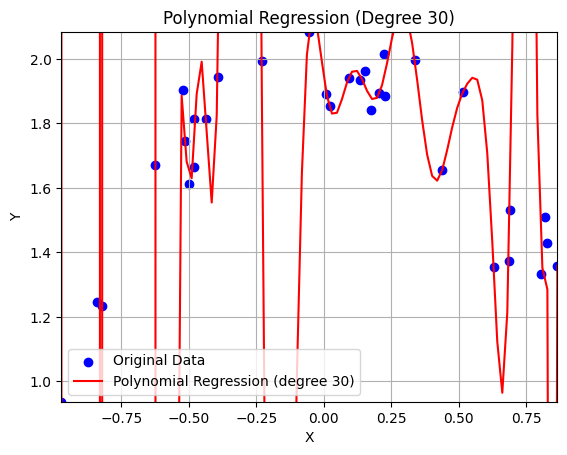

In [6]:
coefficients_and_intercept = train_and_plot_polynomial_regression(X_train, Y_train, degree_used)

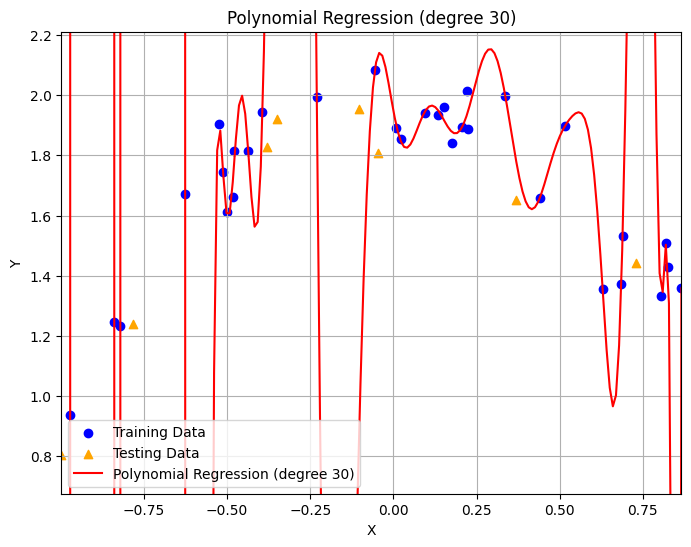

Square loss on the test set (degree 30): 400235503358784.56


In [7]:
square_loss = predict_and_evaluate(coefficients_and_intercept, degree_used, X_train, Y_train, X_test, Y_test)
print(f"Square loss on the test set (degree {degree_used}): {square_loss}")

Training a polynomial regression model with L1 regularization

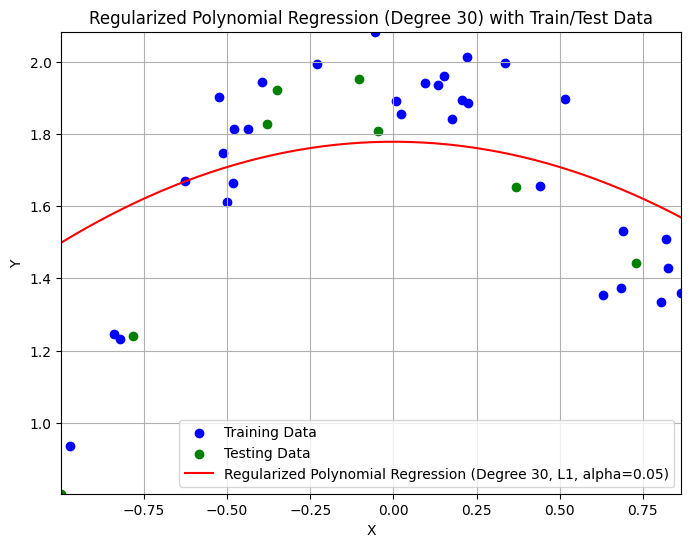

RMSE with L1 Regularization (degree 30, alpha=0.05): 0.30274488783337344


In [8]:
alpha_value = 0.05 # Example alpha value for regularization

# Train with L1 (Lasso) regularization
rmse_lasso = train_and_plot_regularized_polynomial_regression(X_train, Y_train, X_test, Y_test, degree_used, regularization_type='L1', alpha=alpha_value)
print(f"RMSE with L1 Regularization (degree {degree_used}, alpha={alpha_value:.2f}): {rmse_lasso}")

Training a polynomial regression model with L2 regularization

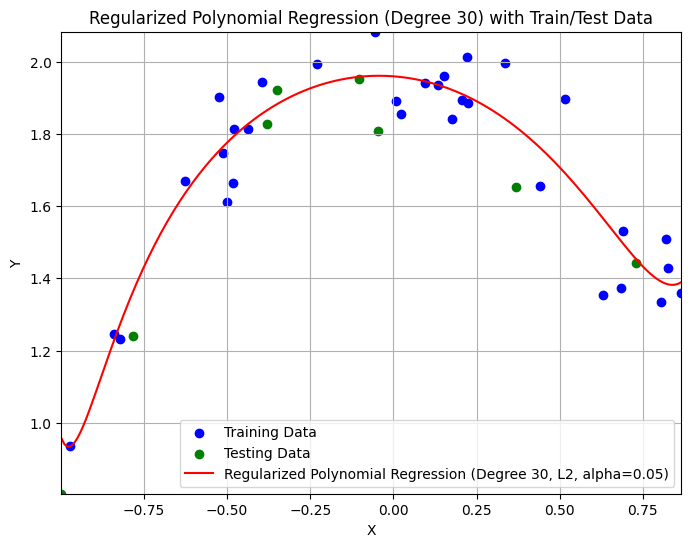

RMSE with L2 Regularization (degree 30, alpha=0.05): 0.10800013182491401


In [9]:
alpha_value = 0.05 # Example alpha value for regularization

# Train with L2 (Ridge) regularization
rmse_ridge = train_and_plot_regularized_polynomial_regression(X_train, Y_train, X_test, Y_test, degree_used, regularization_type='L2', alpha=alpha_value)
print(f"RMSE with L2 Regularization (degree {degree_used}, alpha={alpha_value:.2f}): {rmse_ridge}")